In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_csv(r'E:\data base\New folder/healthcare-dataset-stroke-data.csv')
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
Data.drop(columns='id',inplace=True)

In [6]:
Data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
Data.fillna(Data['bmi'].mean(),inplace=True)

In [8]:
Data.duplicated().sum()

0

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
columns = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in columns :
  Data[i] = encoder.fit_transform(Data[i])

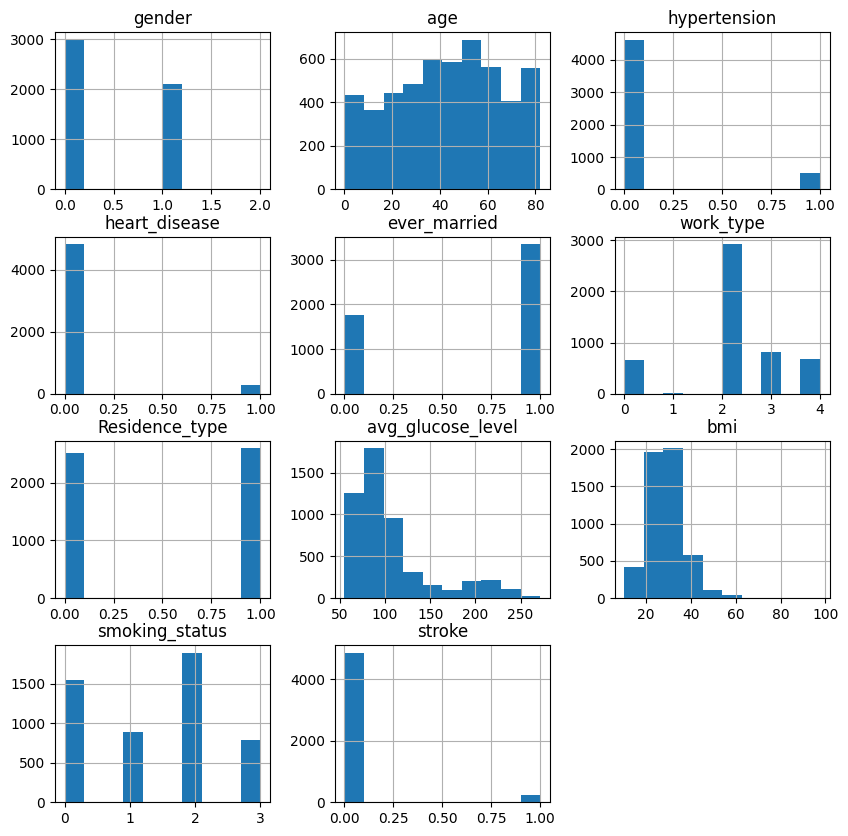

In [12]:
Data.hist(figsize=(10,10))
plt.show()

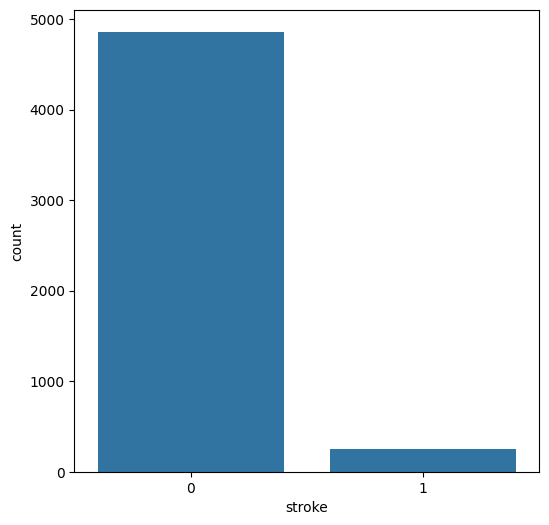

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='stroke',data=Data)
plt.show()

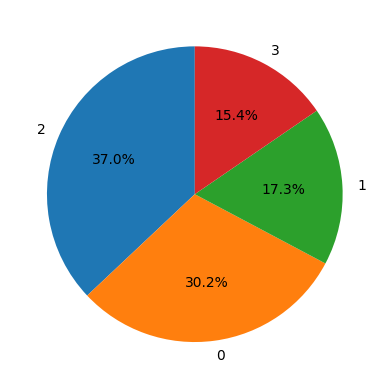

In [14]:
Values = Data['smoking_status'].value_counts()
plt.pie(Values, labels=Values.index, autopct='%1.1f%%', startangle=90)
plt.show()

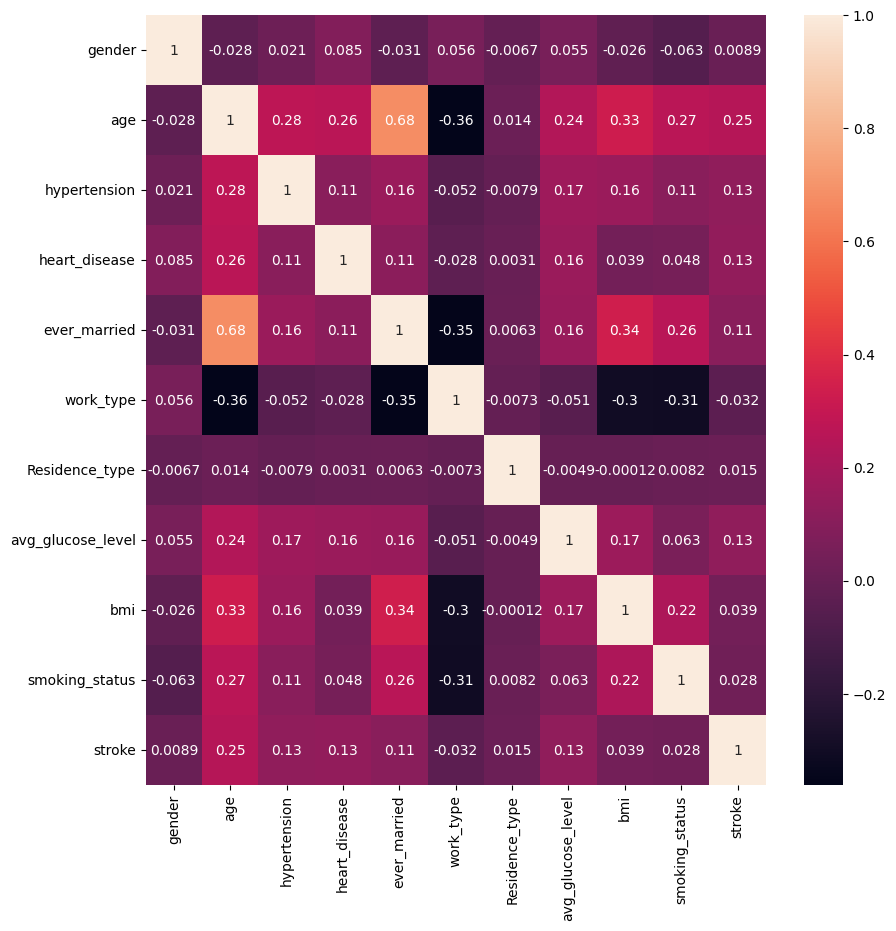

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

In [16]:
x = Data.drop(columns='stroke',axis=1)
y = Data['stroke']

In [17]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier()
Model.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
y_pred = Model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f""" The Accuracy : {accuracy * 100:.2f}%""")

 The Accuracy : 94.19%


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [22]:
important = Model.feature_importances_
column = x.columns

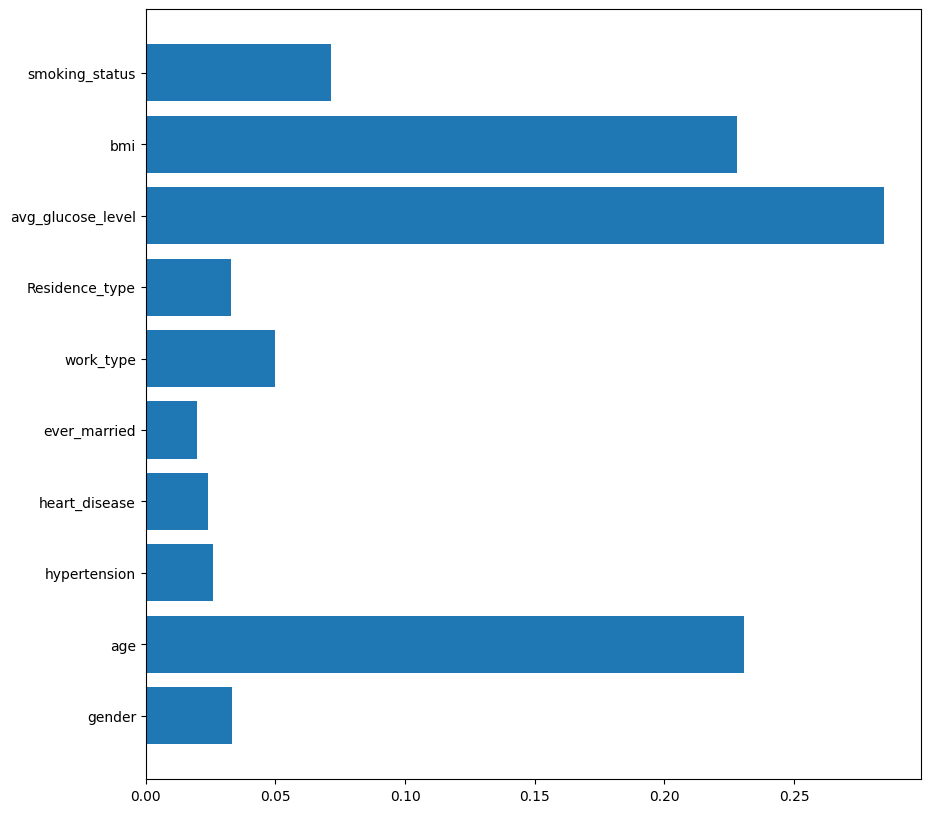

In [23]:
plt.figure(figsize=(10,10))
plt.barh(column,important)
plt.show()